# European Tour Destinations Dataset


## 1. Introducao

- Nesta analise foram explorados diversos dados relacionados a destinos turisticos ao redor da europa. Com o objetivo de identificar tendencias e insights sobre paises,comidas,religiao,moeda local, entre outras areas. Os dados foram retirados de um dataset proveniente do site KAGGLE.

## 2. Carregamento e Preparação dos Dados

### 2.1. Importacao das bibloiotecas 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.2 Carregamento dos dados

In [8]:
df = pd.read_excel(r'/Users/christophe/Downloads/destinations.xlsx') #Substitua pelo seu local de arquivo
print(df.head()) 
print(len(df))  

  Destination    Region Country Category   Latitude  Longitude  \
0        Rome     Lazio   Italy     City  41.902782  12.496366   
1    Florence   Tuscany   Italy     City  43.769581  11.255772   
2      Venice    Veneto   Italy     City  45.435559  12.336196   
3       Milan  Lombardy   Italy     City  45.464643   9.188540   
4      Naples  Campania   Italy     City  40.851330  14.254720   

  Approximate Annual Tourists Currency Majority Religion  \
0                  14 million     Euro    Roman Catholic   
1                  10 million     Euro    Roman Catholic   
2                  10 million     Euro    Roman Catholic   
3                   7 million     Euro    Roman Catholic   
4                   5 million     Euro    Roman Catholic   

                   Famous Foods Language  \
0          Pizza, Pasta, Gelato  Italian   
1          Pizza, Pasta, Gelato  Italian   
2          Pizza, Pasta, Gelato  Italian   
3  Risotto, Ossobuco, Panettone  Italian   
4         Pizza, Pasta

- O dataframe possui 39 colunas com 1013 linhas

In [9]:
df.describe()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

### 2.3. Limpeza dos dados

In [10]:
perct_missing_values = df.isnull().sum()*100 / len(df)
perct_missing_values.sort_values()
df = df.drop_duplicates()

**Observação:**
- Os dados foram carregados do arquivo `destinations.xlsx`.
- Duplicatas foram removidas para garantir a qualidade dos dados.

## 3. Analise Social

### 3.1. Analise do Nivel de seguranca por pais

Contagem de Níveis de Segurança:
Safety Level
Alta segurança     171
Média segurança     37
Baixa segurança      1
Name: count, dtype: int64

Países com mais destinos seguros:
Country
Austria           10
Sweden            10
Norway            10
Monaco            10
Denmark           10
Malta             10
Iceland           10
Switzerland       10
Belgium            9
Luxembourg         9
Greece             9
Germany            9
Portugal           9
Serbia             9
United Kingdom     9
Turkey             9
Russia             6
Ukraine            5
Italy              3
France             3
Spain              2
Name: count, dtype: int64


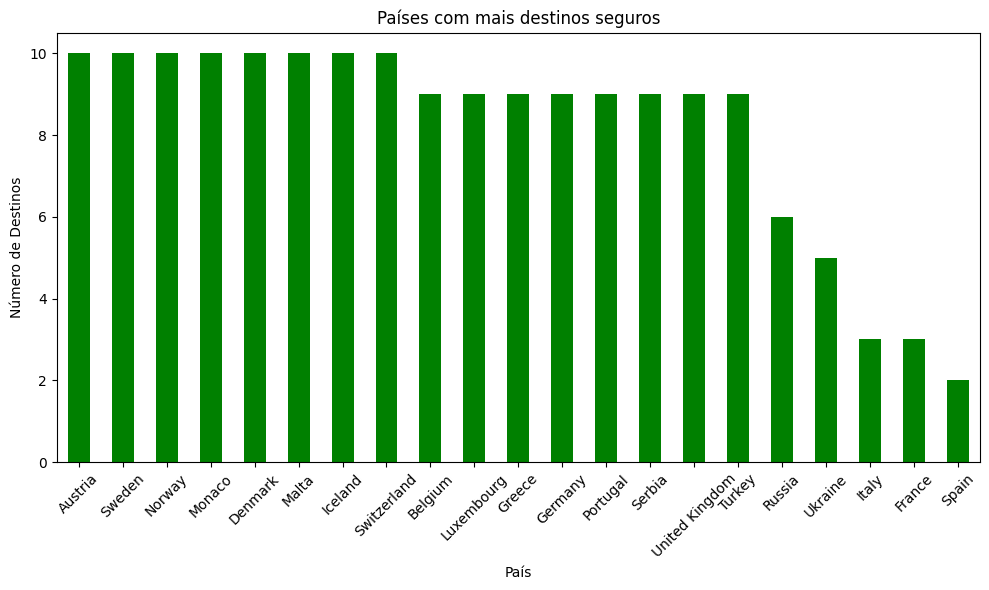

In [18]:
def classify_safety(value):
    if isinstance(value, str):
        if "Generally safe" in value and "but" not in value:
            return "Alta segurança"
        elif "Generally safe, but" in value:
            return "Média segurança"
    return "Baixa segurança"

df['Safety Level'] = df['Safety'].apply(classify_safety)

safety_counts = df['Safety Level'].value_counts()

print("Contagem de Níveis de Segurança:")
print(safety_counts)

country_safety_counts = df[df['Safety Level'] == "Alta segurança"]['Country'].value_counts()

print("\nPaíses com mais destinos seguros:")
print(country_safety_counts)

plt.figure(figsize=(10, 6))
country_safety_counts.plot(kind='bar', color='green')
plt.title('Países com mais destinos seguros')
plt.xlabel('País')
plt.ylabel('Número de Destinos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- Observa-se que, dos 8 paises mais seguros, 5 estao no norte europeu, 2 na europa central e 1 no sul da europa.

- Noruega, Dinamarca e Suecia compoe juntas a peninsula escadinavia, considerada uma das regioes mais seguras da europa.

- Italia, Franca e Espanha possuem os destinos menos seguros da europa, a principal razao disso se da ao alto numero de furtos registrados nos paises.

- Paris possui 611 roubos/100 mil habitantes, sendo a cidade com mais furtos da europa, seguido por barcelona com 398 roubos/100 mil habitantes.

### 3.2. Analise do custo de vida 


Contagem de Destinos por Nível de Custo de Vida:
Cost of Living Level
Medium-high       107
Medium             72
High               15
Free               10
Extremely high      4
Unknown             1
Name: count, dtype: int64

Países com o Maior Custo de Vida:
Country
Switzerland       4
Monaco            4
Iceland           2
France            2
Greece            2
Italy             1
Denmark           1
Germany           1
Norway            1
United Kingdom    1
Name: count, dtype: int64


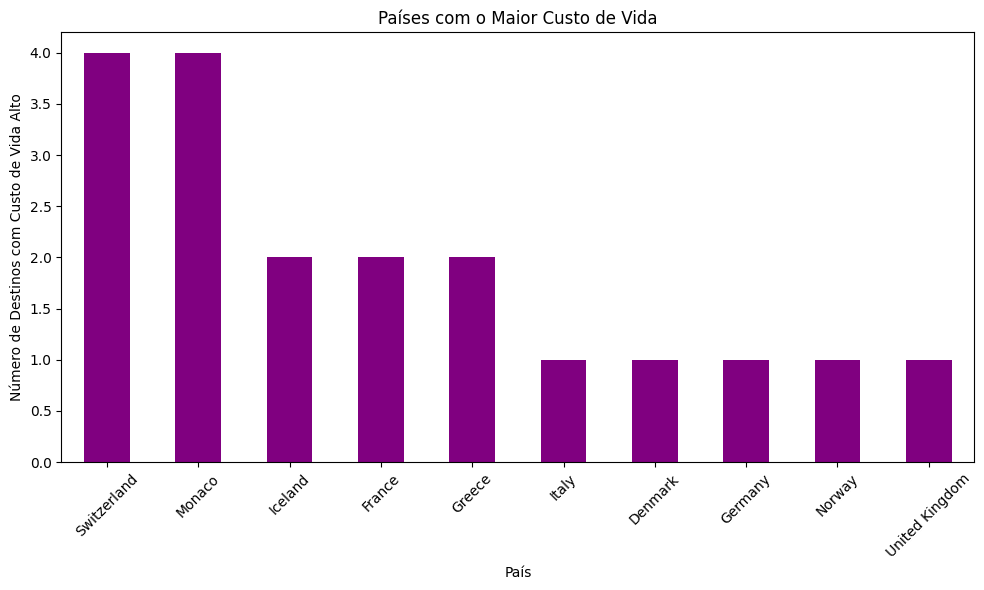

In [ ]:
def classify_cost_of_living(value):
    if isinstance(value, str):
        if "Extremely high" in value:
            return "Extremely high"
        elif "High" in value:
            return "High"
        elif "Medium-high" in value:
            return "Medium-high"
        elif "Medium" in value:
            return "Medium"
        elif "Free" in value:
            return "Free"
    return "Unknown"

df['Cost of Living Level'] = df['Cost of Living'].apply(classify_cost_of_living)

cost_of_living_counts = df['Cost of Living Level'].value_counts()

print("\nContagem de Destinos por Nível de Custo de Vida:")
print(cost_of_living_counts)

high_cost_countries = df[df['Cost of Living Level'].isin(["Extremely high", "High"])]['Country'].value_counts()

print("\nPaíses com o Maior Custo de Vida:")
print(high_cost_countries)

plt.figure(figsize=(10, 6))
high_cost_countries.plot(kind='bar', color='purple')
plt.title('Países com o Maior Custo de Vida')
plt.xlabel('País')
plt.ylabel('Número de Destinos com Custo de Vida Alto')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


- A Suica lidera o ranking com o maior numero de destinos com um alto custo de vida, seguida por Monaco e Islandia. Isso ocorre pois tais paises possuem um alto padrao de vida e renda media, com uma alta qualidade de servicos e infraestrutura, oque acaba por encarecer o custo de se viver neles

## 4. Analise Cultural

### 4.1. Analise de Religiao por Destino


Contagem de Destinos por Religião Predominante:
Majority Religion
Roman Catholic              92
Protestant                  57
Muslim                      10
Greek Orthodox              10
Serbian Orthodox            10
Ukrainian Orthodox          10
Russian Orthodox             9
Christian (Anglican)         8
Christian (Presbyterian)     2
Muslim, Russian Orthodox     1
Name: count, dtype: int64


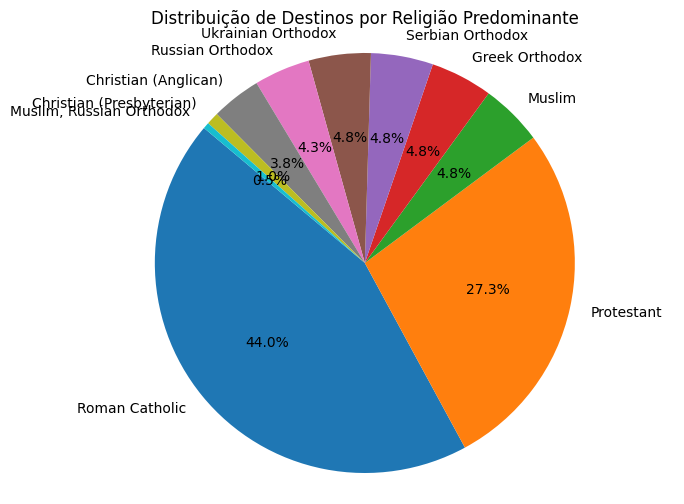

In [ ]:
religion_counts = df['Majority Religion'].value_counts()

print("\nContagem de Destinos por Religião Predominante:")
print(religion_counts)

plt.figure(figsize=(8, 6))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Destinos por Religião Predominante')
plt.axis('equal')  # Para deixar o gráfico de pizza circular
plt.show()


- A religiao romana catolica é a religiao oficial de mais de 90 destinos do dataset, representando 44% do total das religioes presentes.

- A religiao protestante fica em segundo lugar com mais de 55 destinos do dataset tendo ela como sua religiao oficial, com 27.3% do total.

- O russo orthodoxo e o islã sao as religioes menos presentes nos destinos, com apenas 0.5% do total e estando presentes em apenas 1 lugar cada.

### 4.2.Analise das comidas mais famosas

Top 5 comidas mais famosas:
Borscht: 20 ocorrências
Fish: 20 ocorrências
Seafood: 17 ocorrências
Fondue: 11 ocorrências
Raclette: 11 ocorrências


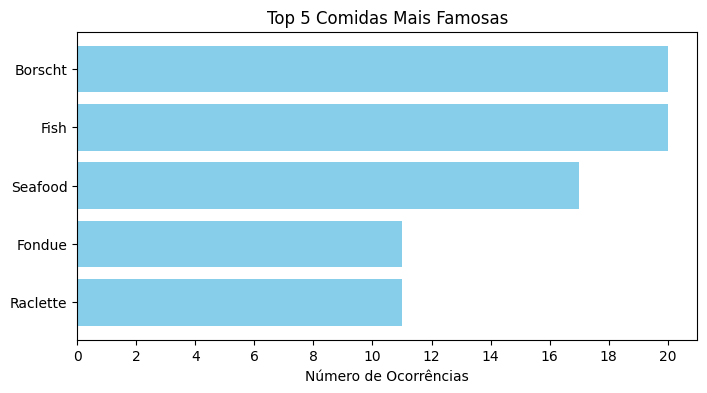

In [ ]:
famous_foods_clean = df['Famous Foods'].dropna()

# Dicionário para contar as ocorrências das comidas
food_counter = {}

for food in famous_foods_clean:
    # Dividir pela vírgula e limpar espaços
    foods = [f.strip() for f in food.split(',')]
    
    # Contar cada comida individualmente
    for f in foods:
        if f in food_counter:
            food_counter[f] += 1
        else:
            food_counter[f] = 1

# Ordenar as comidas pelo número de ocorrências e pegar as 5 mais frequentes
top_5_foods = sorted(food_counter.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 comidas mais famosas:")
for food, count in top_5_foods:
    print(f"{food}: {count} ocorrências")

foods = [item[0] for item in top_5_foods]
counts = [item[1] for item in top_5_foods]

plt.figure(figsize=(8, 4))
plt.barh(foods, counts, color='skyblue')
plt.xlabel('Número de Ocorrências')
plt.title('Top 5 Comidas Mais Famosas')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a comida mais famosa fique no topo

# Ajustar os rótulos do eixo x para inteiros de 2 em 2
plt.xticks(range(0, int(max(counts)) + 1, 2))

plt.show()


- As comidas mais encontradas em destinos do dataset sao: Borscht em 1 lugar, com 20 ocorrencias em destinos, seguida por peixe com 20 ocorrencias tambem e comida do mar com 17 ocorrencias 

### 4.3. Analise Linguistica

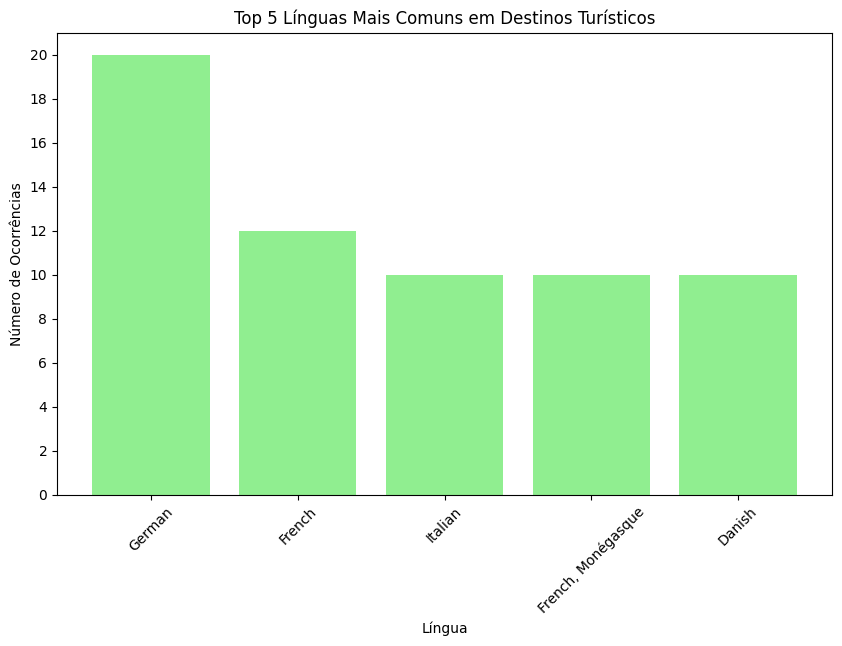

Frequência das Línguas:
Language
German                20
French                12
Italian               10
French, Monégasque    10
Danish                10
Name: count, dtype: int64


In [ ]:
language_counts = df['Language'].value_counts()

top_languages = language_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_languages.index, top_languages.values, color='lightgreen')
plt.xlabel('Língua')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Línguas Mais Comuns em Destinos Turísticos')
plt.xticks(rotation=45)  

# Ajustar os rótulos do eixo y para inteiros de 2 em 2
plt.yticks(range(0, int(max(top_languages.values)) + 1, 2))

plt.show()

print("Frequência das Línguas:")
print(top_languages)

- O alemao é a lingua mais falada nos destinos do dataset sendo utilizada em 20 destinos, seguida pelo frances falado em 12. italiano, frances monegasco e dinarmarques sao todos falados na mesma quantidade de destinos

## 5. Analise Geografica e Demografica

### 5.1. Analise dos destinos e paises mais visitados

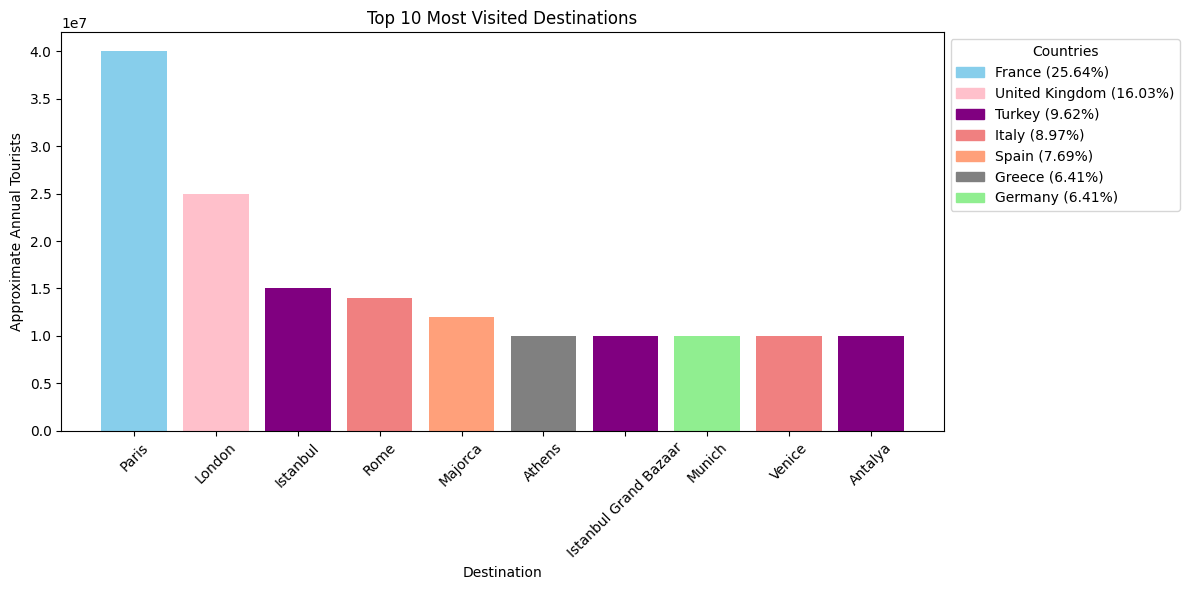

Frequência dos Destinos Mais Visitados:
          Destination  Approximate Annual Tourists
117             Paris                   40000000.0
82             London                   25000000.0
65           Istanbul                   15000000.0
126              Rome                   14000000.0
89            Majorca                   12000000.0
..                ...                          ...
13        Bettembourg                      25000.0
141  Sremski Karlovci                      25000.0
31             Comino                      20000.0
147          Subotica                      20000.0
164    Vrnjačka Banja                      10000.0

[173 rows x 2 columns]


In [ ]:
df_cleaned = df.dropna(subset=['Approximate Annual Tourists'])

def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip() 
        if not all(c.isdigit() or c in [' ', 'm', 'M', 'i', 'I', 'l', 'L', 'o', 'O', 'n', 'N', '-', ',', '(', ')'] for c in value):
            return None  

        if 'million' in value:
            value = value.replace('million', '').strip()  
            value = value.replace(',', '')  
            # Lidar com intervalos, considerando sempre o maior valor
            if '-' in value:
                value = value.split('-')[-1].strip()  # Pega o valor maior do intervalo
            return float(value) * 1_000_000  
        else:
            # Se não contém 'million', tentar converter diretamente
            value = value.replace(',', '')  
            return float(value)  
    try:
        return float(value)  
    except ValueError:
        print(f"Erro ao converter o valor: {value}")  
        return None

df_cleaned['Approximate Annual Tourists'] = df_cleaned['Approximate Annual Tourists'].apply(convert_to_numeric)

df_cleaned = df_cleaned.dropna(subset=['Approximate Annual Tourists'])

tourist_counts = df_cleaned.groupby(['Destination', 'Country'])['Approximate Annual Tourists'].sum().reset_index()

top_destinations = tourist_counts.sort_values(by='Approximate Annual Tourists', ascending=False).head(10)

total_tourists = top_destinations['Approximate Annual Tourists'].sum()

top_destinations['Percentage'] = (top_destinations['Approximate Annual Tourists'] / total_tourists) * 100

country_colors = {
    'France': 'skyblue',
    'United Kingdom': 'pink',
    'Turkey': 'purple',
    'Italy': 'lightcoral',
    'Germany': 'lightgreen',
    'Spain': 'lightsalmon',
    'Russia': 'brown',
}

plt.figure(figsize=(12, 6))

bars = plt.bar(top_destinations['Destination'], top_destinations['Approximate Annual Tourists'], color=colors)

plt.title('Top 10 Most Visited Destinations')
plt.xlabel('Destination')
plt.ylabel('Approximate Annual Tourists')

sorted_countries = top_destinations.groupby('Country')['Percentage'].first().reset_index()
sorted_countries = sorted_countries.sort_values(by='Percentage', ascending=False)

legend_labels = [f"{row['Country']} ({row['Percentage']:.2f}%)" for _, row in sorted_countries.iterrows()]
handles = [plt.Rectangle((0, 0), 1, 1, color=country_colors.get(country, 'grey')) for country in sorted_countries['Country']]

plt.legend(handles, legend_labels, title='Countries', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

destinos_frequencia = df_cleaned.groupby('Destination')['Approximate Annual Tourists'].sum().reset_index()

destinos_frequencia = destinos_frequencia.sort_values(by='Approximate Annual Tourists', ascending=False)

print("Frequência dos Destinos Mais Visitados:")
print(destinos_frequencia)


- A Franca é o pais mais visitado do dataset com 25.6% do total. Destaque para paris que é o destino mais visitado de todos, com 40 milhoes de visitantes anuais.

- Londres e Istanbul vem logo em seguida com respectivamente 2.5 milhoes e 1.5 milhoes de visitantes anuais cada.

- A Servia possui o destino menos visitado de todos. Sua vila, Vrnjacka Banja possui apenas mil visitantes anuais

### 5.2. Analise das categorias de destinos mais visitados

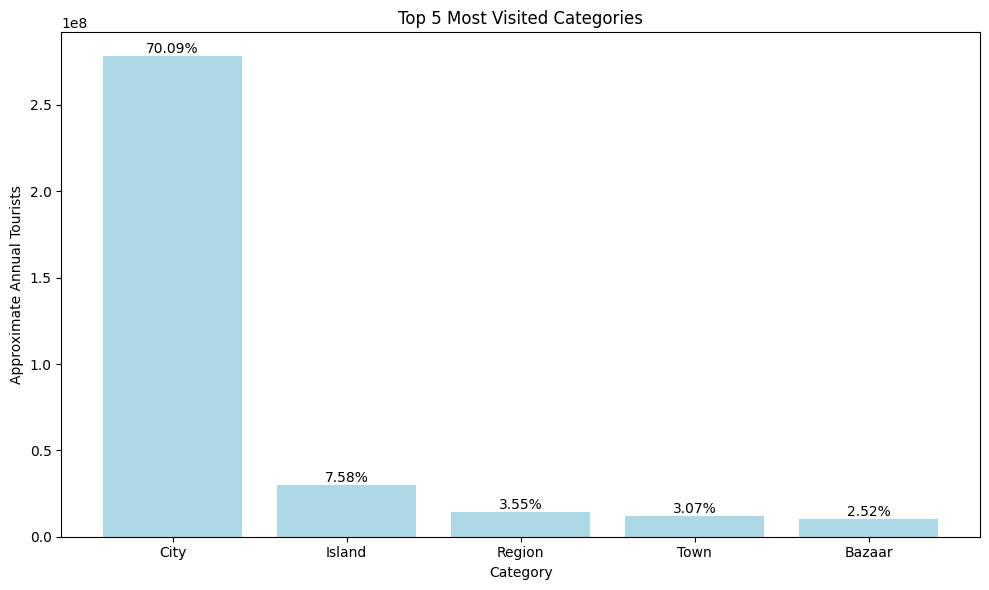

   Category  Approximate Annual Tourists
6      City                  278120000.0
20   Island                   30070000.0
38   Region                   14100000.0
43     Town                   12200000.0
2    Bazaar                   10000000.0


In [ ]:
category_counts = df_cleaned.groupby('Category')['Approximate Annual Tourists'].sum().reset_index()

total_tourists = category_counts['Approximate Annual Tourists'].sum()
category_counts['Percentage'] = (category_counts['Approximate Annual Tourists'] / total_tourists) * 100

top_categories = category_counts.sort_values(by='Approximate Annual Tourists', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_categories['Category'], top_categories['Approximate Annual Tourists'], color='lightblue')

for bar, percentage in zip(bars, top_categories['Percentage']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Top 5 Most Visited Categories')
plt.xlabel('Category')
plt.ylabel('Approximate Annual Tourists')

plt.tight_layout()
plt.show()

category_counts = df_cleaned.groupby('Category')['Approximate Annual Tourists'].sum().reset_index()

top_categories = category_counts.sort_values(by='Approximate Annual Tourists', ascending=False).head(5)

print(top_categories)

- A categoria de cidades é a mais visitada quando se trata dos tipos de destinos, possuindo mais de 70% do total das categorias e tendo aproximadamente 278.12 milhoes de visitantes anuais.

- A categoria de bazaar é a menos visitada com apenas 2.52% do total, e aproximadamente 10 milhoes.

### 5.3. Analise das moedas mais presentes em destinos

Contagem das moedas:
                        Currency  Count
0                     EURO (EUR)     91
1              SWISS FRANC (CHF)      9
2             TURKISH LIRA (TRY)      9
3          ICELANDIC KRÓNA (ISK)      9
4            SERBIAN DINAR (RSD)      9
5   BRITISH POUND STERLING (GBP)      9
6        UKRAINIAN HRYVNIA (UAH)      9
7          NORWEGIAN KRONE (NOK)      8
8            SWEDISH KRONA (SEK)      8
9             DANISH KRONE (DKK)      7
10           RUSSIAN RUBLE (RUB)      6


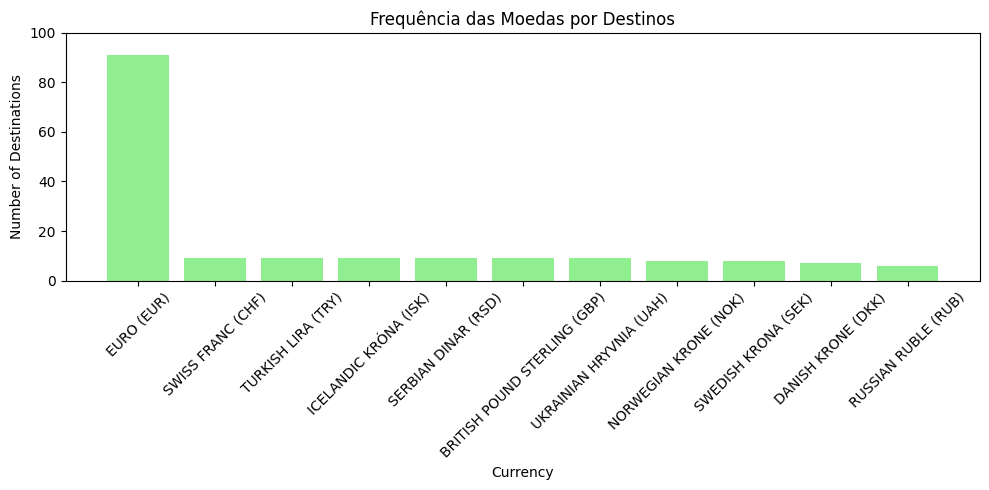

In [ ]:
# Remover espaços em branco e garantir a capitalização correta
df_cleaned['Currency'] = df_cleaned['Currency'].str.strip().str.upper()

# Substituir todas as variações de 'EURO' por 'EURO (EUR)'
df_cleaned['Currency'] = df_cleaned['Currency'].replace({'EURO': 'EURO (EUR)', 'EURO (EUR)': 'EURO (EUR)'}, regex=False)

# Remover repetições usando a função unique()
df_cleaned['Currency'] = df_cleaned['Currency'].apply(lambda x: 'EURO (EUR)' if 'EURO (EUR)' in x else x)

currency_counts = df_cleaned['Currency'].value_counts().reset_index()
currency_counts.columns = ['Currency', 'Count']

currency_counts = currency_counts.sort_values(by='Count', ascending=False)

print("Contagem das moedas:")
print(currency_counts)

plt.figure(figsize=(10, 5))
bars = plt.bar(currency_counts['Currency'], currency_counts['Count'], color='lightgreen')

plt.title('Frequência das Moedas por Destinos')
plt.xlabel('Currency')
plt.ylabel('Number of Destinations')

plt.ylim(0, 100)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- O EURO(EUR) é a moeda oficial de mais de 90 destinos do dataset, sendo a moeda mais utilizada nos destinos.

- O RUBI RUSSO(RUB) é a moeda oficial menos utilizada, estando presente em apenas 6 destinos.


### 5.4. Analise dos melhores tempos para se visitar os destinos

    Best Time  Count
0      Spring    136
1      Summer     17
2  Year-round     15
3      Winter      6


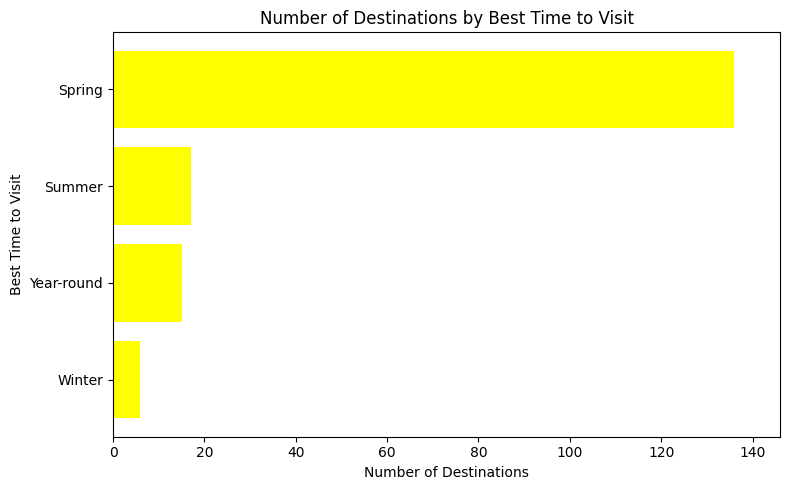

In [ ]:
# Contar quantos destinos têm cada categoria de melhor época para visitar
df_cleaned['Best Time to Visit'] = df_cleaned['Best Time to Visit'].str.extract(r'(Winter|Spring|Summer|Year-round)')[0]

best_time_counts = df_cleaned['Best Time to Visit'].value_counts().reset_index()
best_time_counts.columns = ['Best Time', 'Count']

print(best_time_counts)

best_time_counts = df_cleaned['Best Time to Visit'].str.extract(r'(Winter|Spring|Summer|Year-round)', expand=False).value_counts().reset_index()
best_time_counts.columns = ['Best Time', 'Count']

best_time_counts = best_time_counts.sort_values(by='Count', ascending=True)

plt.figure(figsize=(8, 5))
bars = plt.barh(best_time_counts['Best Time'], best_time_counts['Count'], color='yellow')
plt.title('Number of Destinations by Best Time to Visit')
plt.xlabel('Number of Destinations')
plt.ylabel('Best Time to Visit')

# Definir o limite do eixo X.
plt.xlim(0, best_time_counts['Count'].max() + 10)

plt.tight_layout()

- A primavera é o melhor tempo de se visitar a maioria dos destinos segundo o dataset, sendo a estacao recomendada para 136 lugares.

- O inverno é considerado o pior tempo de visita aos destinos, sendo a estacao recomendada para apenas 6 dos 174 destinos disponiveis

## 6. Conclusoes finais

Baseando-se nos dados obtidos ao longo da analise, podemos destacar os seguintes fatores como indicativos de visita para os destinos do dataset


**6.1. Analise Social**

- Os paises mais seguros para visita estao localizados no norte europeu e europa central, dentre os quais se destacam Dinamarca, Suecia e Noruega, sendo a Suica o pais com o maior custo de vida devido a sua incrivel infraestrutura.

**6.2. Analise Cultural**

- A religiao catolica romana é a religiao predominante nos destinos, sendo a oficial em 90 dos 174 presentes no dataset, com a protestante vindo logo em seguida. As comidas mais famosas sao o borscht e o peixe e a lingua mais falada de todos os destinos é o Alemao e em 2 lugar o Frances

**6.3. Analise Demografica**

- A Franca, em especial paris é o destino mais visitado, com 40 milhoes de visitantes anuais, Vrnjačka Banja na servia é o menos, com apenas 1000 visitas. A categoria de destinos mais visitados é a cidade, com quase 280 milhoes de visitas ao ano. O euro(EUR) é a moeda mais utilizada nos locais e a melhor estacao para se conhecer os destinos do dataset é a primavera, ja a menos recomendada é o inverno